# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [16]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

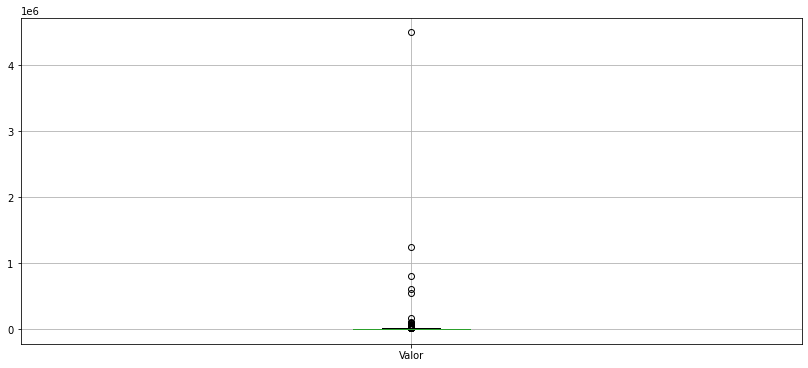

In [17]:
dados.boxplot(['Valor'])

In [18]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [19]:
valor = dados['Valor']

<img src ="compressed_box-plot.png" width = 70%>

In [20]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5  * IIQ
limite_superior = Q3 + 1.5  * IIQ

In [26]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

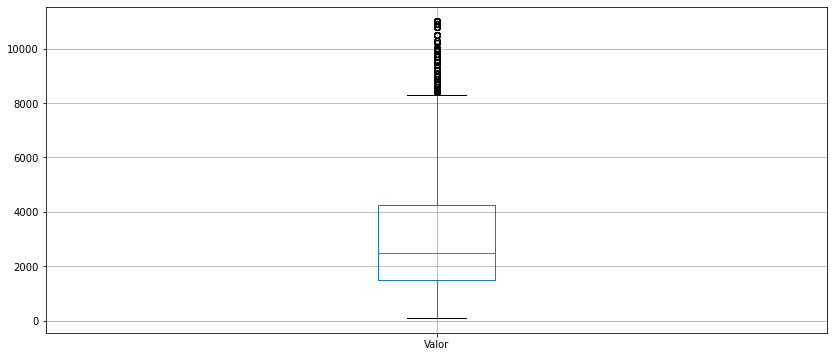

In [27]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

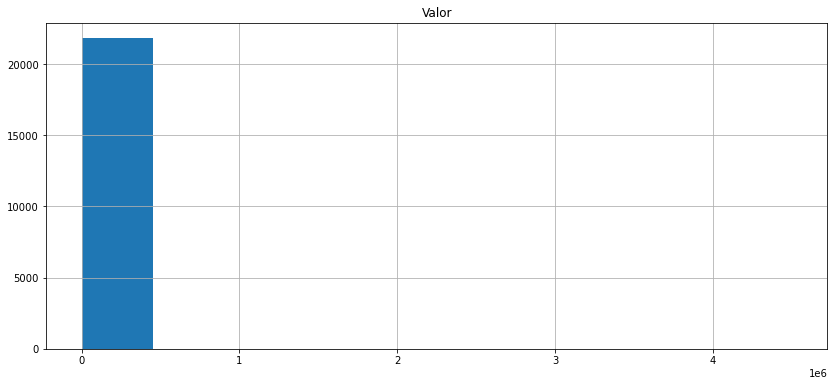

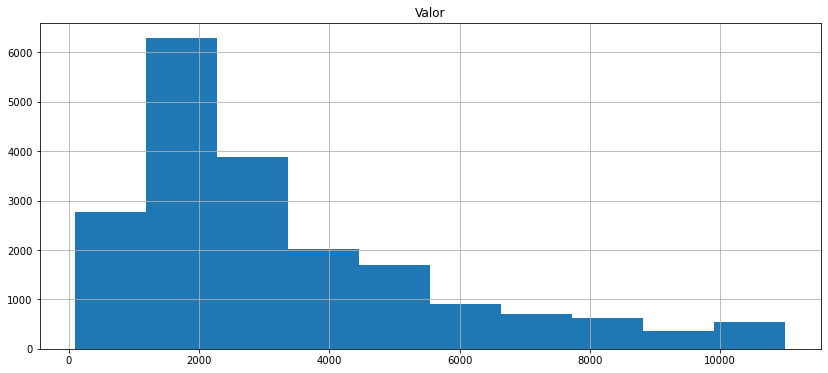

In [28]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

In [37]:
alugueis_classe_Alta = dados_new['Valor'] >= 6000

In [38]:
dados_altos = dados_new[alugueis_classe_Alta]
dados_altos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento
24,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0,26.46,Apartamento
43,Apartamento,Barra da Tijuca,4,3,3,153,6500.0,2300.0,434.0,42.48,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21772,Apartamento,Recreio dos Bandeirantes,4,2,2,230,7000.0,1490.0,0.0,30.43,Apartamento
21781,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,0.0,0.0,18.47,Casa
21785,Apartamento,Leblon,2,1,1,90,10500.0,23511.0,352.0,116.67,Apartamento
21787,Apartamento,Leblon,4,3,2,280,10000.0,3315.0,770.0,35.71,Apartamento


<AxesSubplot:>

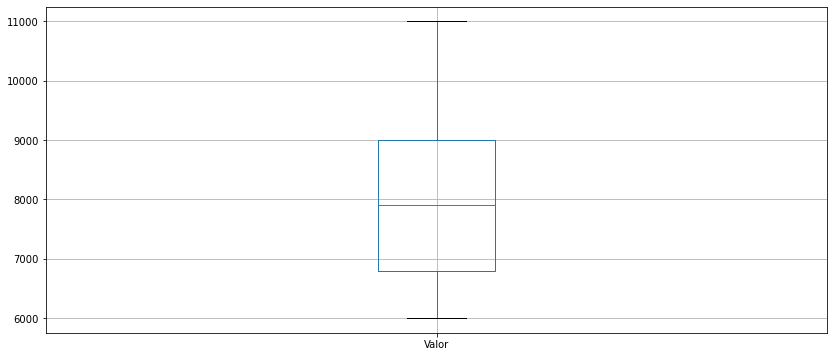

In [39]:
dados_altos.boxplot(['Valor'])

<AxesSubplot:>

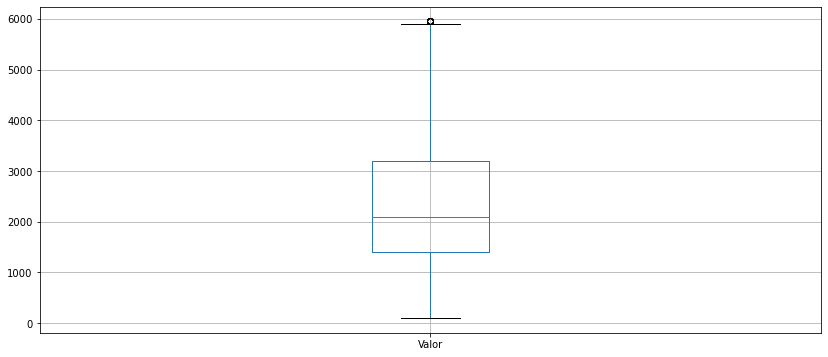

In [40]:
alugueis_classe_Baixa = dados_new['Valor'] < 6000
dados_baixo = dados_new[alugueis_classe_Baixa]
dados_baixo.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

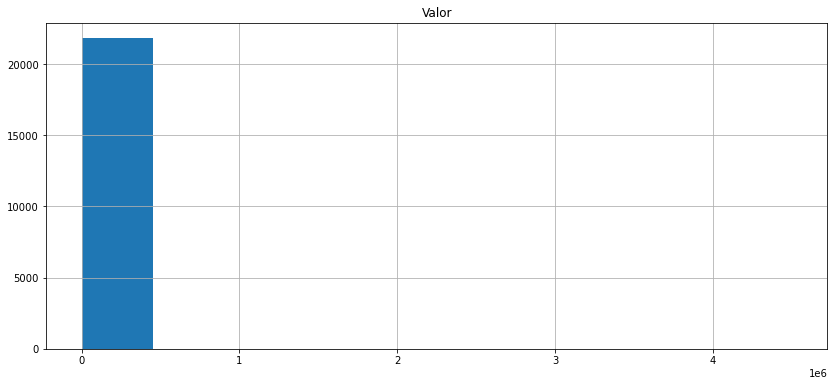

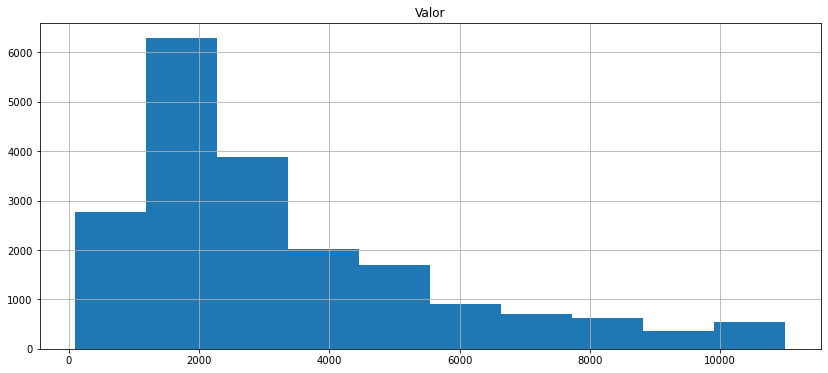

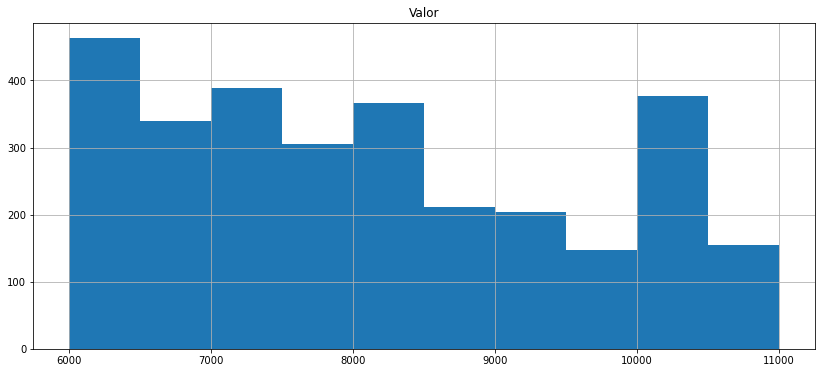

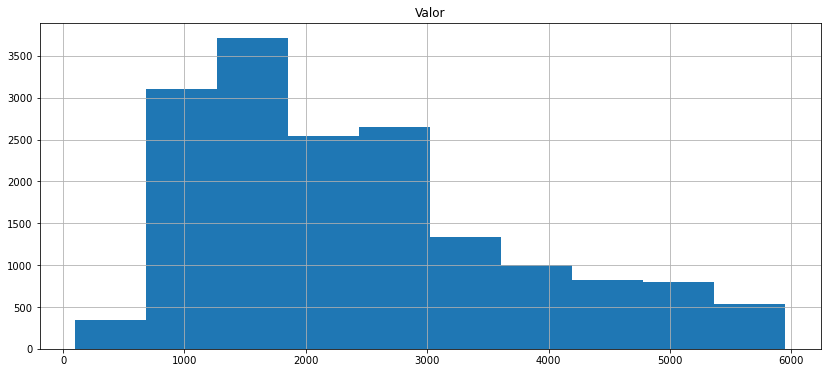

In [41]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])
dados_altos.hist(['Valor'])
dados_baixo.hist(['Valor'])

In [43]:
dados_amostra = pd.read_csv('dados/aluguel_amostra.csv' , sep =';')

In [44]:
dados_amostra

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [45]:
m2 = dados_amostra['Valor m2']

In [47]:
Q1 = m2.quantile(.25)
Q3 = m2.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5  * IIQ
limite_superior = Q3 + 1.5  * IIQ

In [48]:
Q1

21.25

In [49]:
Q3

42.31

In [50]:
IIQ

21.060000000000002

In [51]:
limite_inferior

-10.340000000000003

In [52]:
limite_superior

73.9

<AxesSubplot:>

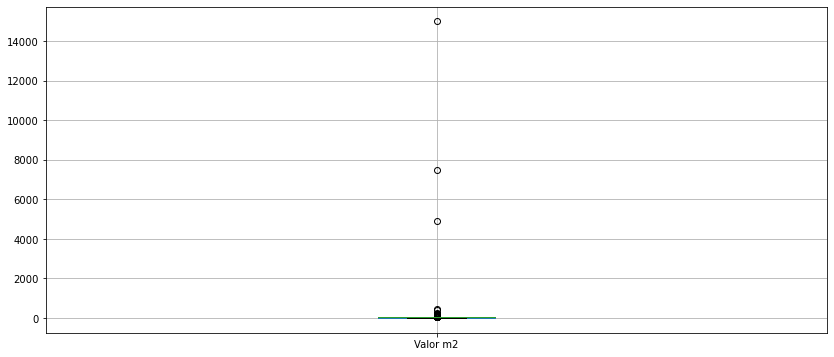

In [53]:
dados_amostra.boxplot(['Valor m2'])

## Identificando e Removendo Outliers (Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

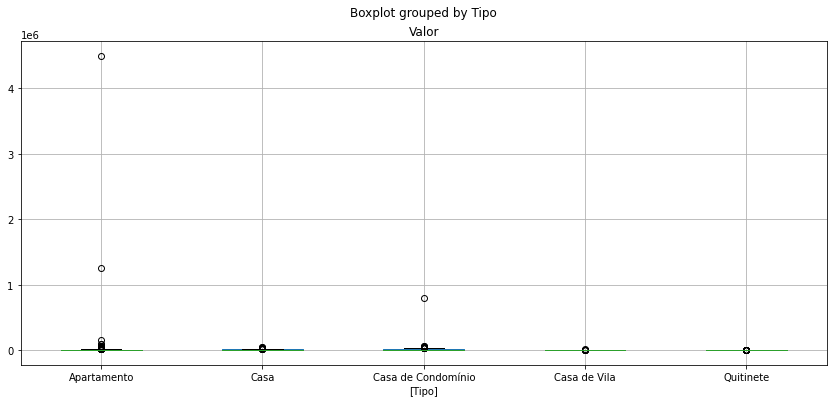

In [55]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [59]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [60]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [61]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 68, 70, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 119, 120, 121, ...], 'Casa': [13, 31, 50, 54, 74, 109, 115, 123, 127, 172, 181, 202, 210, 236, 247, 261, 291, 307, 360, 385, 478, 512, 541, 550, 557, 601, 611, 624, 631, 633, 637, 641, 642, 692, 702, 787, 793, 796, 812, 813, 843, 858, 869, 880, 884, 894, 931, 942, 943, 962, 1001, 1014, 1097, 1141, 1155, 1190, 1192, 1278, 1286, 1307, 1325, 1338, 1340, 1371, 1459, 1510, 1538, 1542, 1668, 1675, 1719, 1735, 1741, 1769, 1783, 1800, 1878, 1897, 1926, 1929, 1951, 1960, 1972, 1976, 2035, 2096, 2112, 2117, 2122, 2213, 2240, 2253, 2267, 2292, 2329, 2332, 2373, 2405, 2459, 2486, ...], 'Casa de 

In [62]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5  * IIQ
limite_superior = Q3 + 1.5  * IIQ

In [63]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64

In [65]:
limite_superior['Casa']

20850.0

In [77]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

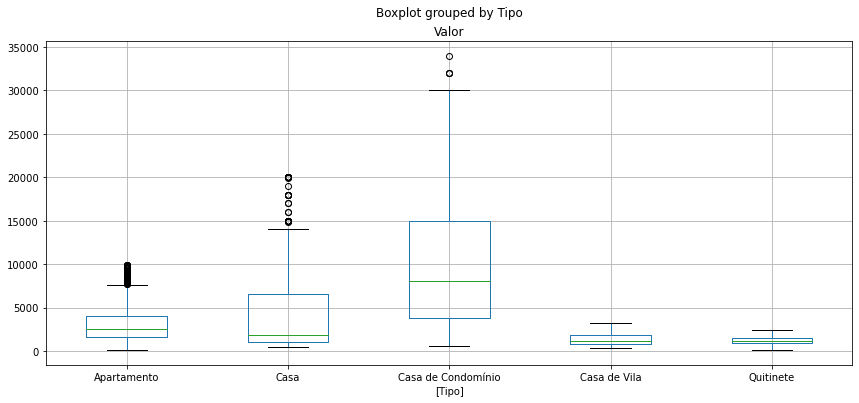

In [78]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [81]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep =';', index= False)